In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn import datasets

iris  = datasets.load_iris()

features = iris.data
target = iris.target

data = pd.DataFrame(features)
data.columns = iris.feature_names

print(data.shape)

(150, 4)


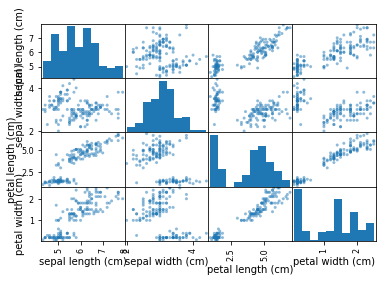

In [4]:
from pandas.plotting import scatter_matrix

scatter_matrix(data)
mp.show()

In [5]:
from sklearn.cluster import KMeans

X = []
Y = []

for i in range(1,31):
    
    kmeans = KMeans(n_clusters =i)
    
    kmeans.fit(data)
    
    X.append(i)
    
    avg_cluspoint = kmeans.inertia_ / data.shape[0]
    
    Y.append(avg_cluspoint)

    

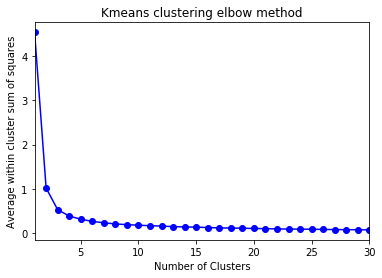

In [6]:
mp.plot(X,Y,'-bo')
mp.xlim(1,30)

mp.xlabel("Number of Clusters")
mp.ylabel("Average within cluster sum of squares")
mp.title("Kmeans clustering elbow method")
mp.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components=2)

pc = pca.fit_transform(data)
print(pc.shape)
print(pc[:10])

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [8]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

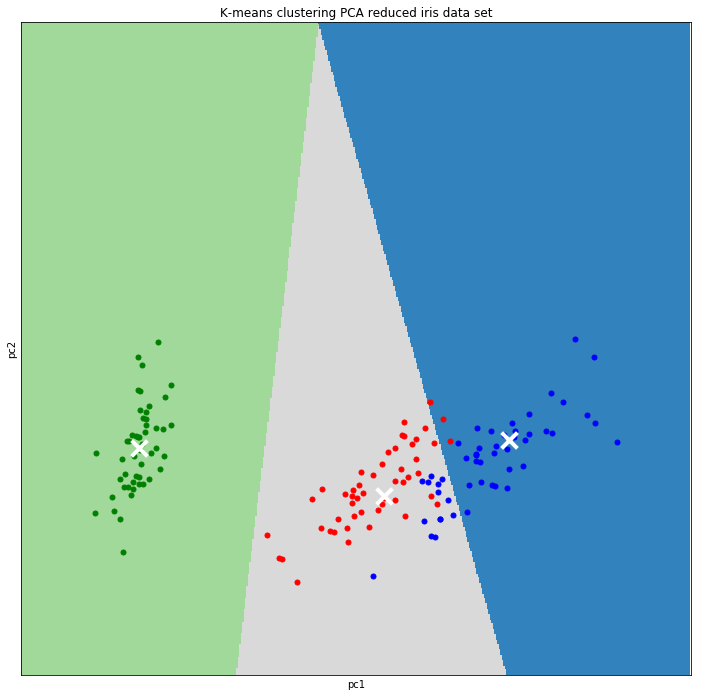

In [9]:
h = 0.02

x_min,x_max = pc[:,0].min()-1,pc[:,0].max()+1
y_min,y_max = pc[:,1].min()-1,pc[:,0].max()+1

xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

mp.figure(figsize = (12,12))
mp.clf()

mp.imshow(z, interpolation = 'nearest', extent = (xx.min(),xx.max(),yy.min(),yy.max()),
         cmap = mp.cm.tab20c,
         aspect = 'auto', origin = 'lower')


for i,point in enumerate(pc):
    if target[i] == 0:
        mp.plot(point[0],point[1],'g.',markersize=10)
    elif target[i] ==1:
        mp.plot(point[0],point[1],'r.',markersize=10)
    elif target[i] ==2:
        mp.plot(point[0],point[1],'b.',markersize=10)
        

        
centroids = kmeans.cluster_centers_
mp.scatter(centroids[:,0], centroids[:,1], marker = 'x', s=250,
          linewidth = 4, color = 'w', zorder = 10)

mp.title('K-means clustering PCA reduced iris data set')
mp.xlim(x_min,x_max)
mp.ylim(y_min,y_max)
mp.xlabel('pc1')
mp.ylabel('pc2')
mp.xticks(())
mp.yticks(())
mp.show()